# Adjective position rates in a corpus of Argentinean Spanish
Juan Berrios | juanberrios@pitt.edu | Last updated: October 4, 2020

**Summary and overview of the data:**

- This is a continuation of a prior corpus processing notebook. The purpose of this notebook is to extract adjective position usage rates in the previously processed subset of data.

**Contents:**
1. [Preparation](#1.-Preparation)  includes the necessary preparations.
2. [Loading files](#2.-Loading-files)  includes code for loading the files and examining them.
3. [Adjective position rates](#3.-Adjective-position-rates)  includes code for extracting position rates for the adjective lexemes under study.
4. [Plotting](#4.-Plotting)  includes code for data visualization.

## 1. Preparation

- Loading libraries and additional settings:

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

# Settings for plotting

matplotlib.rcParams['font.sans-serif'] = "Century Gothic"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['axes.labelsize'] = 14

#Turning pretty print off:
%pprint

#Releasing all output:                                            
from IPython.core.interactiveshell import InteractiveShell #Prints all commands rather than the last one.
InteractiveShell.ast_node_interactivity = "all"

Pretty printing has been turned OFF


## 2. Loading files

- Loading pickled file:

In [2]:
ar_df = pd.read_pickle('pkl/ar_DF.pkl')
ar_df.shape

(374161, 10)

- Some extra cleaning tasks before analysis. First, removing 'Buenos Aires' tokens:

In [3]:
#Lowercasing

ar_df['Word'] = ar_df['Word'].str.lower()
ar_df['Following_word'] = ar_df['Following_word'].str.lower()
ar_df['Previous_word'] = ar_df['Previous_word'].str.lower()

In [4]:
#Filtering out "Buenos Aires"

ar_df = ar_df[(ar_df['Following_word'] != 'aires') & (ar_df['Word'] != 'buenos')]

- Now let's try solving the mystery of the unknowns:

In [5]:
untagged = ar_df[ar_df['Number'] == 'unknown'] #Extract untagged

In [6]:
untagged.shape

(127438, 10)

In [7]:
ar_df = ar_df[ar_df['Number'] != 'unknown']

In [8]:
ar_df.shape

(233253, 10)

In [9]:
untagged['Word'].unique() #Individual words that we can extract grammatical information from

array(['gran', 'buen', 'nueva', 'buena', 'nuevo', 'nuevas', 'rudo',
       'nova', 'frescas', 'fresca', 'novo', 'bue', 'rudos', 'wena',
       'granes', 'bueno', 'weno', 'buens', 'nevo', 'nuevass'],
      dtype=object)

In [10]:
misspelled = ['nova',  'novo', 'bue',  'wena','granes','weno', 'buens', 'nevo', 'nuevass']

In [11]:
untagged = untagged[~untagged['Word'].isin(misspelled)] #Removing misspelled forms. There's only a few of them. 

In [12]:
number_dict = {'gran':'singular', 'buen':'singular', 'nueva':'singular', 'buena':'singular', 'nuevo':'singular',
               'nuevas':'plural', 'rudo':'singular', 'frescas':'plural', 'fresca':'singular', 'rudos':'plural',
               'bueno':'singular'}

In [13]:
untagged['Number'] = untagged['Word'].map(number_dict) #Map new values

In [14]:
df = pd.concat([ar_df, untagged], sort=True) #Putting both data frames back together

In [15]:
df

,Following_POS,Following_word,Lemma,Number,POS,Previous_POS,Previous_word,SourceID,TokenID,Word
2171,nms,integrante,nuevo,singular,jfs,ld-fs,la,30,2245675103,nueva
2647,nfs,pareja,nuevo,singular,jfs,li-fs,una,30,2245675579,nueva
2861,nfs,onda,bueno,singular,jfs,ld-fs,la,30,2245675793,buena
3415,nms,representante,nuevo,singular,jms,dp-,su,40,2407904224,nuevo
4624,nmp,diarios,grande,plural,jmp,ld-mp,los,40,2407905433,grandes
...,...,...,...,...,...,...,...,...,...,...
10440267,nms,partido,bueno,singular,j,li-ms,un,1405689,1898822123,buen
10440322,nms,resultado,bueno,singular,j,li-ms,un,1405689,1898822178,buen
10441803,nms,esfuerzo,grande,singular,j,li-ms,un,1405719,1907146676,gran
10442385,nms,comienzo,bueno,singular,j,li-ms,un,1405729,1909545195,buen


## 3. Adjective position rates

- Let's first add a position to every row based on whether the POS following the token is a noun or not:

In [16]:
#If the following word is a noun, tag prenominal, tag postnominal otherwise.

df['Position'] = np.where(df['Following_POS'].str.contains('n'), 'prenominal', 'postnominal')

In [17]:
df #Preview

,Following_POS,Following_word,Lemma,Number,POS,Previous_POS,Previous_word,SourceID,TokenID,Word,Position
2171,nms,integrante,nuevo,singular,jfs,ld-fs,la,30,2245675103,nueva,prenominal
2647,nfs,pareja,nuevo,singular,jfs,li-fs,una,30,2245675579,nueva,prenominal
2861,nfs,onda,bueno,singular,jfs,ld-fs,la,30,2245675793,buena,prenominal
3415,nms,representante,nuevo,singular,jms,dp-,su,40,2407904224,nuevo,prenominal
4624,nmp,diarios,grande,plural,jmp,ld-mp,los,40,2407905433,grandes,prenominal
...,...,...,...,...,...,...,...,...,...,...,...
10440267,nms,partido,bueno,singular,j,li-ms,un,1405689,1898822123,buen,prenominal
10440322,nms,resultado,bueno,singular,j,li-ms,un,1405689,1898822178,buen,prenominal
10441803,nms,esfuerzo,grande,singular,j,li-ms,un,1405719,1907146676,gran,prenominal
10442385,nms,comienzo,bueno,singular,j,li-ms,un,1405729,1909545195,buen,prenominal


In [18]:
df.info() #Some general information about the resulting data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360556 entries, 2171 to 10442795
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Following_POS   360556 non-null  object
 1   Following_word  360556 non-null  object
 2   Lemma           360556 non-null  object
 3   Number          360556 non-null  object
 4   POS             360556 non-null  object
 5   Previous_POS    360556 non-null  object
 6   Previous_word   360556 non-null  object
 7   SourceID        360556 non-null  object
 8   TokenID         360556 non-null  object
 9   Word            360556 non-null  object
 10  Position        360556 non-null  object
dtypes: object(11)
memory usage: 33.0+ MB


In [19]:
#Creating a subset for plural forms only

df_plural = df[(df['Number'] == 'plural')]

In [20]:
df.describe() #Descriptive stats

,Following_POS,Following_word,Lemma,Number,POS,Previous_POS,Previous_word,SourceID,TokenID,Word,Position
count,360556,360556,360556,360556,360556,360556,360556,360556,360556,360556,360556
unique,108,18363,6,2,5,142,12431,102908,360556,23,2
top,nms,parte,nuevo,singular,j,li-ms,un,1399939,1059586047,gran,prenominal
freq,120320,7696,138690,264772,127303,52759,52778,1393,1,88668,328822


In [21]:
df['Lemma'].value_counts() #Counts for position by lemma.

nuevo     138690
grande    127404
bueno      91733
fresco      2181
llano        311
rudo         237
Name: Lemma, dtype: int64

In [22]:
df['Position'].value_counts(ascending=True)   

postnominal     31734
prenominal     328822
Name: Position, dtype: int64

In [23]:
#Position by lemma in raw counts

position_lemma_counts = df.groupby('Lemma').Position.value_counts().unstack()
position_lemma_counts

Position,postnominal,prenominal
Lemma,,
bueno,5639,86094
fresco,1980,201
grande,8526,118878
llano,229,82
nuevo,15247,123443
rudo,113,124


In [24]:
#Position by lemma in percentages

position_lemma_percentages = df.groupby('Lemma').Position.value_counts(normalize=True).unstack()
position_lemma_percentages

Position,postnominal,prenominal
Lemma,,
bueno,0.061472,0.938528
fresco,0.907840,0.092160
grande,0.066921,0.933079
llano,0.736334,0.263666
nuevo,0.109936,0.890064
rudo,0.476793,0.523207


In [25]:
#Position by lemma and number in raw counts

position_lemma_number_counts = df.groupby(['Lemma','Number']).Position.value_counts().unstack()
position_lemma_number_counts

Position         postnominal  prenominal
Lemma  Number                           
bueno  plural           1717       10436
       singular         3922       75658
fresco plural            733          59
       singular         1247         142
grande plural           2585       28691
       singular         5941       90187
llano  plural             61           6
       singular          168          76
nuevo  plural           6099       45335
       singular         9148       78108
rudo   plural             33          29
       singular           80          95

In [26]:
# Position by lemma and number in percentages

position_lemma_number_percentages = df.groupby(['Lemma','Number']).Position.value_counts(normalize=True).unstack()
position_lemma_number_percentages 

Position         postnominal  prenominal
Lemma  Number                           
bueno  plural       0.141282    0.858718
       singular     0.049284    0.950716
fresco plural       0.925505    0.074495
       singular     0.897768    0.102232
grande plural       0.082651    0.917349
       singular     0.061803    0.938197
llano  plural       0.910448    0.089552
       singular     0.688525    0.311475
nuevo  plural       0.118579    0.881421
       singular     0.104841    0.895159
rudo   plural       0.532258    0.467742
       singular     0.457143    0.542857

## 4. Plotting

Text(0.5, 1.0, 'Figure 1. Adjective position by lemma.')

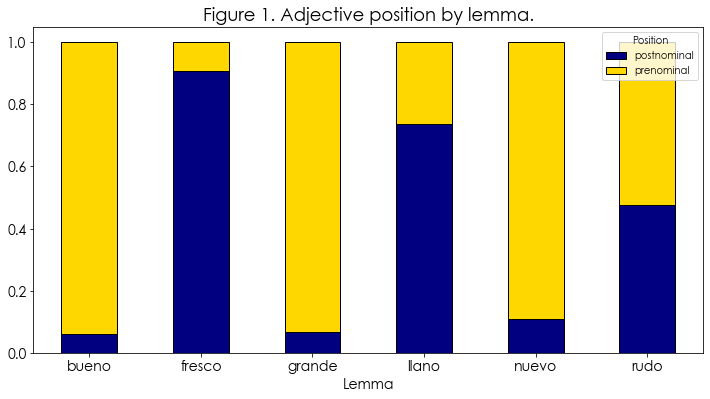

In [27]:
#Build general plot

position_lemma_percentages.plot(kind='bar',stacked='True', figsize=(12,6), color=['navy', 'gold'], edgecolor='black', 
                        fontsize=14, rot=0)
plt.title('Figure 1. Adjective position by lemma.', fontsize=18)

Text(0.5, 1.0, 'Figure 2. Adjective position by lemma (only plural forms).')

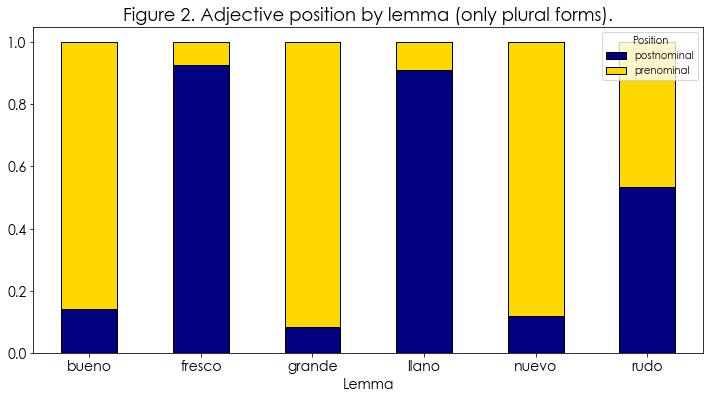

In [28]:
#Build plot for plural forms

position_lemma_percentages_plural = df_plural.groupby('Lemma').Position.value_counts(normalize=True).unstack()

position_lemma_percentages_plural.plot(kind='bar',stacked='True', figsize=(12,6), color=['navy', 'gold'], edgecolor='black', 
                        fontsize=14, rot=0)
plt.title('Figure 2. Adjective position by lemma (only plural forms).', fontsize=18)